Now that we’ve built a couple of useful DataFrames, we can start taking a look at some of the trends in the data. There are a handful of features that aren't very interesting for our purposes of predicting fantasy points, so let's first create a cleaned-up DataFrame with only the features we will look at.

In [87]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

raw = pd.read_csv('top500.csv')

In [88]:
raw.columns

Index(['id_', 'assists', 'bonus', 'bps', 'chance_of_playing_next_round',
       'chance_of_playing_this_round', 'clean_sheets', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'creativity', 'dreamteam_count',
       'element_type', 'ep_next', 'ep_this', 'event_points', 'first_name',
       'form', 'goals_conceded', 'goals_scored', 'ict_index', 'in_dreamteam',
       'influence', 'minutes', 'news', 'news_added', 'now_cost', 'own_goals',
       'penalties_missed', 'penalties_saved', 'photo', 'points_per_game',
       'red_cards', 'saves', 'second_name', 'selected_by_percent', 'special',
       'squad_number', 'status', 'team', 'team_code', 'threat', 'total_points',
       'transfers_in', 'transfers_in_event', 'transfers_out',
       'transfers_out_event', 'value_form', 'value_season', 'web_name',
       'yellow_cards'],
      dtype='object')

In [89]:
df = raw[['element_type', 'goals_scored', 'assists', 'clean_sheets', 'bonus', 
         'bps', 'form', 'creativity', 'influence', 'minutes', 'selected_by_percent', 'total_points']]

Now we can look at the relationship between some of the features and the target variable, total_points

0.5328848054628539


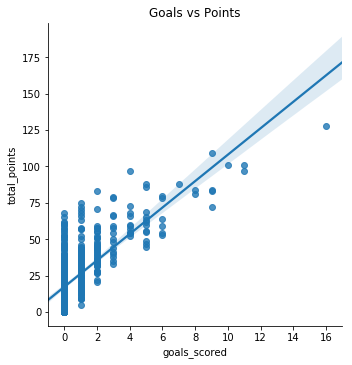

In [90]:
print(stats.pearsonr(df['goals_scored'], df['total_points'])[0] ** 2)
sns.lmplot(x='goals_scored', y='total_points', data=df)
plt.title('Goals vs Points')
plt.show()

0.4263841559936589


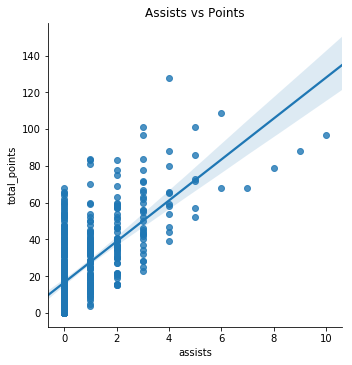

In [91]:
print(stats.pearsonr(df['assists'], df['total_points'])[0] ** 2)
sns.lmplot(x='assists', y='total_points', data=df)
plt.title('Assists vs Points')
plt.show()

0.6278086228959139


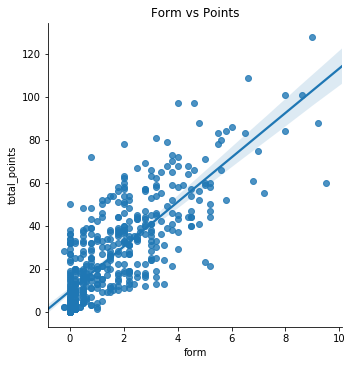

In [92]:
print(stats.pearsonr(df['form'], df['total_points'])[0] ** 2)
sns.lmplot(x='form', y='total_points', data=df)
plt.title('Form vs Points')
plt.show()

0.411173354026388


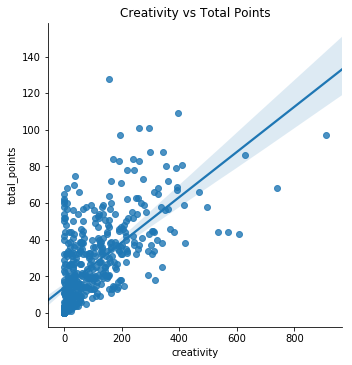

In [93]:
print(stats.pearsonr(df['creativity'], df['total_points'])[0] ** 2)
sns.lmplot(x='creativity', y='total_points', data=df)
plt.title('Creativity vs Total Points')
plt.show()

0.8454988736791009


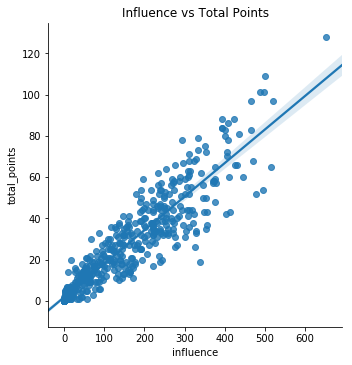

In [94]:
print(stats.pearsonr(df['influence'], df['total_points'])[0] ** 2)
sns.lmplot(x='influence', y='total_points', data=df)
plt.title('Influence vs Total Points')
plt.show()

0.713728647316067


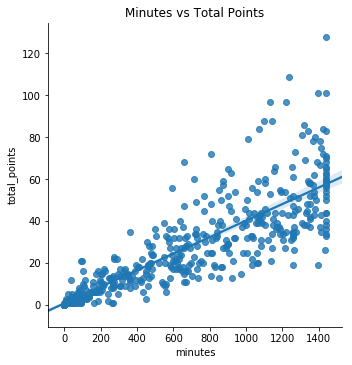

In [68]:
print(stats.pearsonr(df['minutes'], df['total_points'])[0] ** 2)
sns.lmplot(x='minutes', y='total_points', data=df)
plt.title('Minutes vs Total Points')
plt.show()

0.6189895898995368


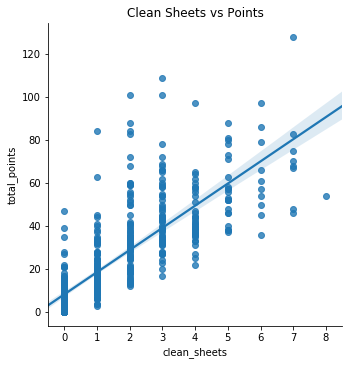

In [69]:
print(stats.pearsonr(df['clean_sheets'], df['total_points'])[0] ** 2)
sns.lmplot(x='clean_sheets', y='total_points', data=df)
plt.title('Clean Sheets vs Points')
plt.show()

0.6924916721486025


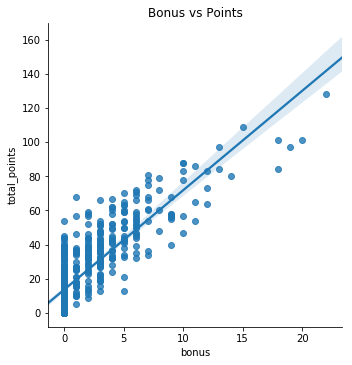

In [70]:
print(stats.pearsonr(df['bonus'], df['total_points'])[0] ** 2)
sns.lmplot(x='bonus', y='total_points', data=df)
plt.title("Bonus vs Points")
plt.show()

0.8499250848590043


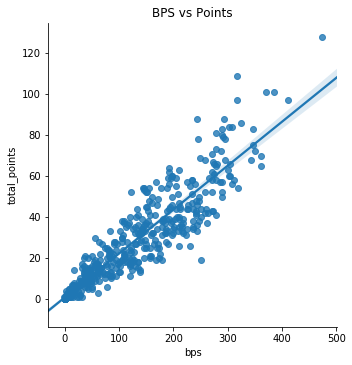

In [71]:
print(stats.pearsonr(df['bps'], df['total_points'])[0] ** 2)
sns.lmplot(x='bps', y='total_points', data=df)
plt.title('BPS vs Points')
plt.show()

0.4619470193744224


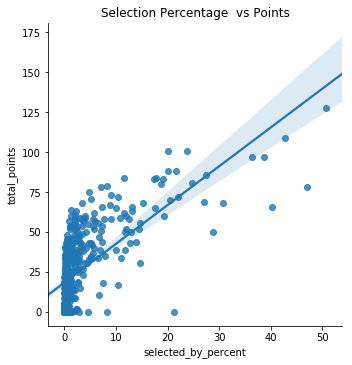

In [73]:
print(stats.pearsonr(df['selected_by_percent'], df['total_points'])[0] ** 2)
sns.lmplot(x='selected_by_percent', y='total_points', data=df)
plt.title('Selection Percentage  vs Points')
plt.show()

It looks like BPS is already a pretty good predictor of fantasy points. BPS stands for Bonus Point System. It is a single number that attempts to describe a player's performance during a game. BPS points are awarded or taken away according to the following rules:

In [ ]:
bps = pd.read_csv('bps.csv')
bps

Let's try combining different features in a linear regression model and see if we can do better.

In [74]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [96]:
m = ols('total_points ~ bps + form', df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:           total_points   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     2017.
Date:                Sun, 15 Dec 2019   Prob (F-statistic):          2.96e-239
Time:                        17:25:57   Log-Likelihood:                -1730.9
No. Observations:                 500   AIC:                             3468.
Df Residuals:                     497   BIC:                             3480.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3010      0.531      0.566      0.5